### Data understanding

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

Input variables:
1) __`CRIM`__: per capita crime rate by town
2) __`ZN`__: proportion of residential land zoned for lots over 25,000 sq.ft.
3) __`INDUS`__: proportion of non-retail business acres per town
4) __`CHAS`__: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5) __`NOX`__: nitric oxides concentration (parts per 10 million)
6) __`RM`__: average number of rooms per dwelling
7) __`AGE`__: proportion of owner-occupied units built prior to 1940
8) __`DIS`__: weighted distances to five Boston employment centres
9) __`RAD`__: index of accessibility to radial highways
10) __`TAX`__: full-value property-tax rate per $10,000
11) __`PTRATIO`__: pupil-teacher ratio by town
12) __`B`__: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13) __`LSTAT`__: % lower status of the population

Output variable:

__`MEDV`__: Median value of owner-occupied homes in $1000's

Link for the dataset: https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data

### Importing libraries

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from copy import copy
import time

### Data overview

In [94]:
initial_data = pd.read_csv('data/boston.csv')
data = copy(initial_data)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [96]:
X, y = data.iloc[:, :-1], data.iloc[:, -1]

In [97]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[:] = scaler.fit_transform(X)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


### Train the model without PCA transformation

In [98]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=41)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f'MSE: {mean_squared_error(y_test, y_pred)}')

end_time = time.time()
print(f'Time to train: {end_time - start_time}')

MSE: 22.94552637273734
Time to train: 0.006982326507568359


### Train the model with PCA transformation

In [99]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

PCA()

Text(0, 0.5, 'Explained variance')

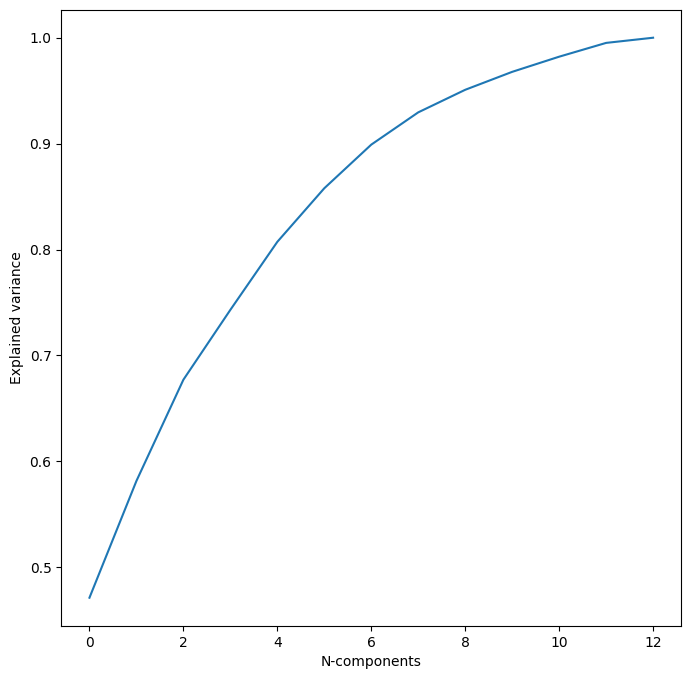

In [100]:
expleined_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,8))
plt.plot(expleined_variance)
plt.xlabel('N-components')
plt.ylabel('Explained variance')

In [101]:
print(f'The best number of components to cover 95% of variance: {np.argmax(expleined_variance >= .95) + 1}')

The best number of components to cover 95% of variance: 9


In [102]:
pca = PCA(n_components=9, random_state=41)
X_train_new = pca.fit_transform(X_train)

start_time = time.time()
model = LinearRegression()
model.fit(X_train_new, y_train)
y_pred = model.predict(pca.transform(X_test))
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
end_time = time.time()
print(f'Time to train: {end_time - start_time}')

MSE: 29.58546899906706
Time to train: 0.0039899349212646484


Text(0, 0.5, 'Component 2')

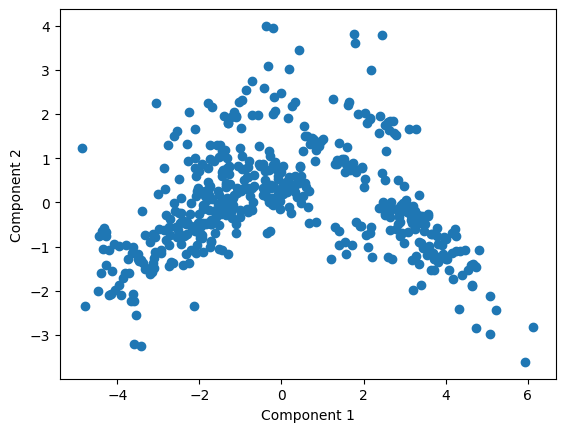

In [103]:
X_new = PCA(n_components=2, random_state=41).fit_transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1])
plt.xlabel("Component 1")
plt.ylabel("Component 2")

Text(0, 0.5, 'Component 2')

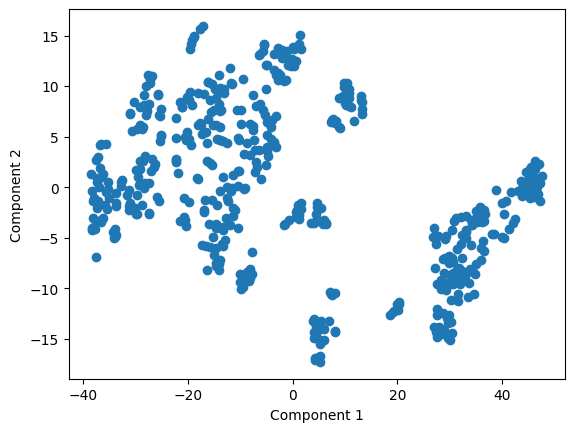

In [104]:
from sklearn.manifold import TSNE

X_new = TSNE(n_components=2, random_state=41).fit_transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1])
plt.xlabel("Component 1")
plt.ylabel("Component 2")

### Conclusions
- The best parameter for PCA n-components to cover 95% of variance is 9.
- With 9 components PCA worsens the MSE metric by 7 units.
- With PCA model trains slightly faster than without it. 